In [2]:
from dash import Dash, html, dcc, Input, Output, dash_table
import dash
import pandas as pd
import plotly.express as px

import pandas as pd
from os import path
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [3]:
nlp_file_path = f"CroLyrics_data/nlp_all.csv"
df = pd.read_csv(nlp_file_path)
df_main_words = df[df.upos.isin(["ADV", "ADJ", "NOUN", "VERB", "PROPN", "DET"])]
df_main_words.dropna(subset=["lemma"], inplace=True)
df_main_words.reset_index(drop=True, inplace=True)
df_main_words["Artist_ID"] = df_main_words.Song_ID.str.split("_").map(lambda x: x[0])


C:\Python\Python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
def get_artist_name(artist_code):
    conn = sqlite3.connect('CroLyrics_data/info.db')
    c = conn.cursor()
    c.execute("SELECT name FROM artists WHERE code=:code", {'code': artist_code})
    return c.fetchone()

In [4]:
conn = sqlite3.connect('CroLyrics_data/info.db')
c = conn.cursor()
c.execute("SELECT name FROM artists")
all_artists = [a[0] for a in c.fetchall()]
all_artists.sort()
conn.close()

In [62]:
df_unique_lemmas_artist = df_main_words.drop_duplicates(subset=["lemma", "Artist_ID"])
df_unique_lemmas_song = df_main_words.drop_duplicates(subset=["lemma", "Song_ID"])

In [104]:
lemma_frequencies_artist[lemma_frequencies_artist==52] ##words that appear in ever artists corpus

In [103]:
#to get unique words per artist
lemma_frequencies_artist = df_unique_lemmas_artist.lemma.value_counts()

artist_ids = df_main_words.Artist_ID.unique()
df_tf_idf = pd.DataFrame()
for artist in artist_ids:
    lemma_freq_artist = df_unique_lemmas_song[df_unique_lemmas_song.Artist_ID==artist].lemma.value_counts()
    lemma_freq_artist = lemma_freq_artist[lemma_freq_artist>1]  #word has to appear in at least two different songs from the artist
    tf = np.log(1+lemma_freq_artist)
    idf = np.log(len(artist_ids) / lemma_frequencies_artist[lemma_freq_artist.index])
    #print(get_artist_name(artist)[0], (tf*idf).sort_values(ascending=False)[0:10])
    df_tf_idf.loc[artist, lemma_freq_artist.index] = (tf*idf)

KeyError: "['zavičaj', 'zal', 'vjenčanje', 'Maslinov', 'živiti', 'proživjeti', 'minjati', 'jecaj', 'previsok'] not in index"

In [697]:
#for clustering 

lemma_frequencies_unique_artist =df_unique_lemmas_artist.lemma.value_counts()
lemma_frequencies_unique_artist = lemma_frequencies_unique_artist[lemma_frequencies_unique_artist>4]#word has to appear in at least x artists

lemma_frequencies_unique_songs = df_unique_lemmas_song.lemma.value_counts()
lemma_frequencies_unique_songs = lemma_frequencies_unique_songs[lemma_frequencies_unique_songs>9]  #word has to appear in at least x songs

lemma_frequencies_unique_songs = lemma_frequencies_unique_songs[lemma_frequencies_unique_songs.index.isin(lemma_frequencies_unique_artist.index)]#word has to appear in at least x artists

num_songs = len(df.Song_ID.unique())
artist_ids = df_main_words.Artist_ID.unique()
df_tf_idf = pd.DataFrame()
for artist in artist_ids:
    lemma_freq_artist = df_unique_lemmas_song[df_unique_lemmas_song.Artist_ID==artist].lemma.value_counts()
    lemma_freq_artist = lemma_freq_artist[(lemma_freq_artist.index.isin(lemma_frequencies_unique_songs.index))]
    lemma_freq_artist = lemma_freq_artist/lemma_freq_artist.sum()
    tf = np.log(1+lemma_freq_artist)
    idf = np.log(num_songs / lemma_frequencies_unique_songs[lemma_freq_artist.index])
    #print(get_artist_name(artist)[0], (tf*idf).sort_values(ascending=False)[0:10])
    df_tf_idf.loc[artist, lemma_freq_artist.index] = (tf*idf)

4791

In [698]:
df_tf_idf = df_tf_idf.replace(0,np.nan).dropna(axis=1,how="all") #drop columns where all values are 0
df_tf_idf = df_tf_idf.fillna(0)
df_tf_idf

,sav,moj,taj,samo,ljubav,znati,tvoj,srce,život,mnogo,...,skupo,pokazivati,složiti,zuriti,princeza,bečar,Drava,snaša,ekran,bevanda
zT3Xu5sD,0.008447,0.009970,0.010059,0.012108,0.013058,0.010256,0.011250,0.012090,0.014433,0.014166,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Xp4QBL1e,0.009671,0.008467,0.011510,0.009388,0.008164,0.011670,0.007684,0.006869,0.003102,0.006222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fv0Kbouf,0.007101,0.008783,0.009396,0.010410,0.008657,0.009901,0.011152,0.007880,0.006757,0.010162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dPHel+/u,0.007195,0.009719,0.012554,0.007040,0.009893,0.012622,0.011688,0.007380,0.003637,0.008654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wNGUjqQ7,0.009942,0.010681,0.011260,0.010419,0.009432,0.009562,0.008912,0.012881,0.015437,0.008517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b1GNJHQO,0.008616,0.007939,0.010854,0.014224,0.014614,0.009362,0.005342,0.012635,0.010073,0.013130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
538Exp8s,0.008091,0.009990,0.009861,0.010970,0.011655,0.009601,0.011246,0.011128,0.006814,0.008788,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RH/jD1hv,0.009734,0.012656,0.009032,0.012718,0.013081,0.009699,0.013347,0.015223,0.010109,0.008827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Wm5tG4b5,0.006464,0.009588,0.009451,0.008712,0.009112,0.007740,0.007001,0.008970,0.012129,0.005510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42+RWAHa,0.008734,0.010429,0.010884,0.011426,0.013088,0.009548,0.011911,0.016017,0.014824,0.007458,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [287]:
from sklearn.metrics.pairwise import euclidean_distances



In [699]:
distances = euclidean_distances(df_tf_idf)

In [700]:
artist_index=19
order = distances[artist_index].argsort()
ranks = order.argsort()
most_similar = np.where(ranks == 1)[0][0]

print(most_similar)
print(get_artist_name(df_tf_idf.reset_index().iloc[artist_index]["index"]))
(get_artist_name(df_tf_idf.reset_index().iloc[most_similar]["index"]))

45
('Miroslav Škoro',)


('Magazin',)

In [259]:
import matplotlib.pyplot as plt


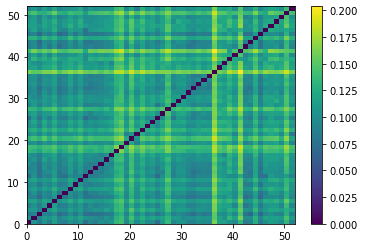

In [632]:
plt.pcolormesh(distances)
plt.colorbar()
#plt.xlim([0,N])
#plt.ylim([0,N])
plt.show()

In [372]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [747]:
#df_tf_idf.drop(["clusters"], axis=1, inplace=True)
pca = PCA(n_components=16)
#distances_pca = pca.fit_transform(distances)
tf_idf_pca = pca.fit_transform(df_tf_idf)

print(np.sum(pca.explained_variance_ratio_))

print(pca.singular_values_)
print(pca.n_samples_, pca.n_features_)


0.607241668516743
[0.18665609 0.15584955 0.14914968 0.12616008 0.12217324 0.11958709
 0.11124501 0.1072993  0.1006666  0.09837623 0.09550431 0.09494469
 0.08829054 0.08670618 0.08484357 0.08424703]
52 2106


In [534]:
df_tf_idf.shape

(52, 2109)

In [748]:
from sklearn.cluster import AffinityPropagation

#clustering = AffinityPropagation(random_state=5, convergence_iter=15).fit(distances)
#clustering = AffinityPropagation(random_state=5).fit(distances_pca)
clustering = AffinityPropagation(random_state=5).fit(tf_idf_pca)

clustering

clustering.labels_

clusters = clustering.predict(tf_idf_pca)



In [749]:
df_tf_idf["clusters"] = clusters
cluster_counts = df_tf_idf["clusters"].value_counts()
cluster_counts

12    15
2     10
1      7
6      6
3      5
0      1
4      1
5      1
7      1
8      1
9      1
10     1
11     1
13     1
Name: clusters, dtype: int64

In [755]:
for a in df_tf_idf[df_tf_idf.clusters == 12].reset_index()["index"]:
    print(get_artist_name(a))

('Crvena Jabuka',)
('Zlatko Pejaković',)
('Severina',)
('Danijela Martinović',)
('Novi Fosili',)
('Parni Valjak',)
('Plavi Orkestar',)
('Vlado Kalember',)
('Jasna Zlokić',)
('Jole',)
('Željko Bebek',)
('Jasmin Stavros',)
('Magazin',)
('Ivan Zak',)
('Gazde',)


In [727]:
##take the clusters that have only one (or few) members and calculate distance to other clusters, and find the one which is closest

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).